In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

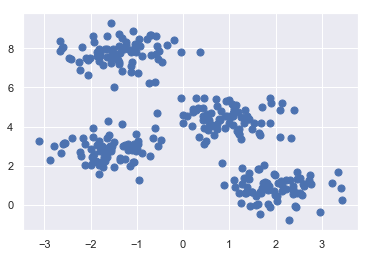

In [38]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

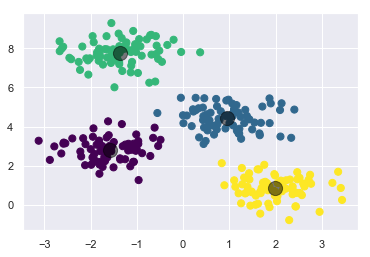

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

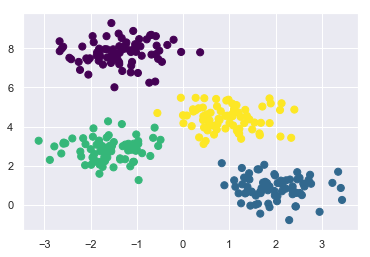

In [41]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=4):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

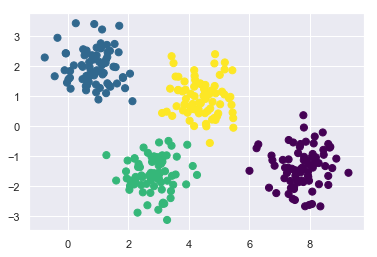

In [6]:
centers, labels = find_clusters(X, 4, rseed=1)
plt.scatter(X[:, 1], X[:, 0], c=labels,
            s=50, cmap='viridis');

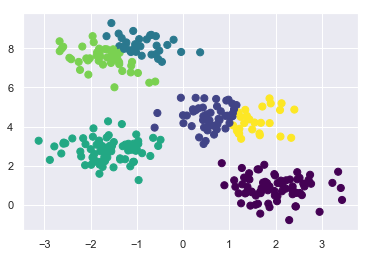

In [7]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

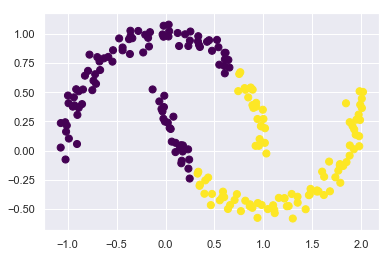

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


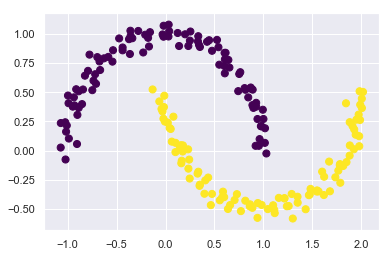

In [10]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

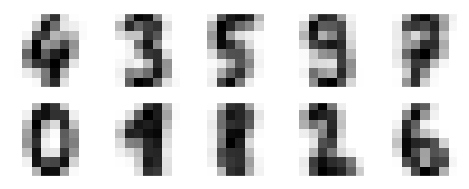

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [15]:

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

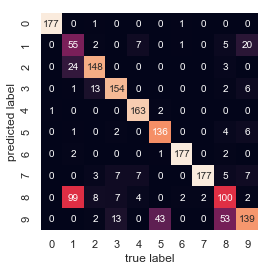

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

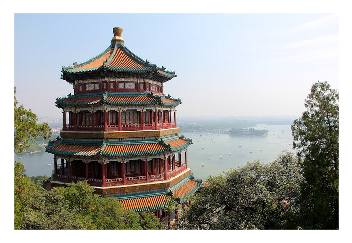

In [18]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [19]:
china.shape

(427, 640, 3)

In [20]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

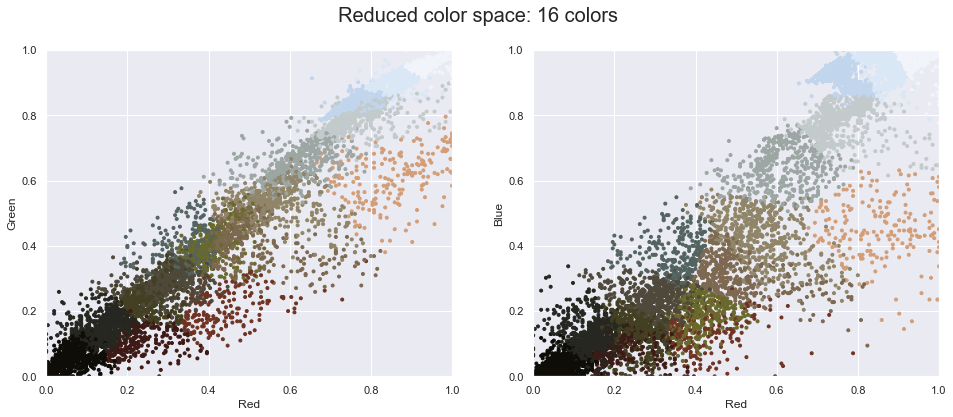

In [22]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

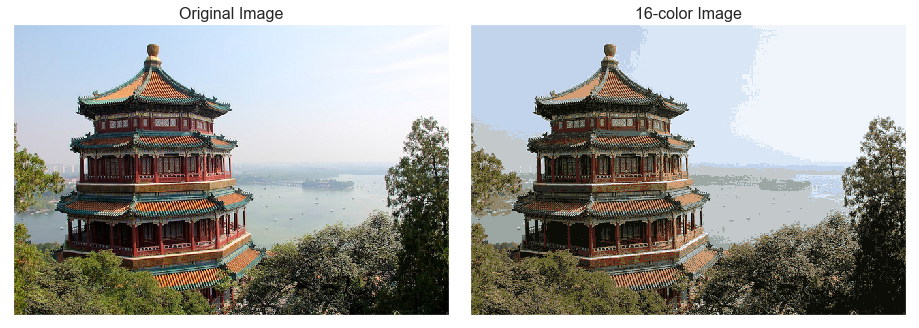

In [23]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [25]:
documents = ['This is the first sentence','this one is the second sentence','and this is the third sentence','Is this the fourth sentence?']

In [26]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# X.torray() is BoW
print(X.toarray())

[[0 1 0 1 0 0 1 1 0 1]
 [0 0 0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1 0 1]]


In [27]:
print(vectorizer.get_feature_names())

['and', 'first', 'fourth', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


ModuleNotFoundError: No module named 'figures'

In [ ]:
import re
def histogram(words):
    #words_list = re.split("(?:(?:[^a-zA-Z]+')|(?:'[^a-zA-Z]+))|(?:[^a-zA-Z']+)", words)
    words_list = re.split("\W*[^\'\w+\']", words)
    #thanks to Martijn Pieters for the above split
    word_dictionary = {}
    counter = len(words_list)
    i = 0
    while i < counter:
        word_dictionary[words_list[i]] = 1
        n = i+1
        while n < counter:
            if words_list[i] == words_list[n]:
                word_dictionary[words_list[i]] += 1
                words_list.pop(n)
                counter -= 1
                n -= 1
            n += 1
        i += 1
    return word_dictionary
def unique_words(histogram):
    return len(histogram)
def frequency(word, histogram):
    return histogram[word]
def create_sorted_array(histogram):
    new_array = []
    count = 0
    for i in histogram:
        new_array.append([histogram[i]])
        new_array[count].append(i)
        count += 1
    new_array.sort()
    return new_array

In [ ]:
from __future__ import division, print_function  # Python 2 and 3 compatibility


class Listogram(list):
    """Listogram is a histogram implemented as a subclass of the list type."""

    def __init__(self, word_list=None):
        """Initialize this histogram as a new list and count given words."""
        super(Listogram, self).__init__()  # Initialize this as a new list
        # Add properties to track useful word counts for this histogram
        self.types = 0  # Count of distinct word types in this histogram
        self.tokens = 0  # Total count of all word tokens in this histogram
        # Count words in given list, if any
        if word_list is not None:
            for word in word_list:
                self.add_count(word)

    def add_count(self, word, count=1):
        """Increase frequency count of given word by given count amount."""
        #print(word)
        #print(self)
        self.tokens += count
        for w in range(0, len(self)):
            if self[w][0] == word:
                self[w][1] += count
                return
        index = len(self)
        self.append([word])
        self[index].append(count)
        self.types += 1

    def frequency(self, word):
        """Return frequency count of given word, or 0 if word is not found."""
        # return self.get(word[0], default=0)
        for w in range(0,len(self)):
            if self[w][0] == word:
                return self[w][1]
        return 0

    def __contains__(self, word):
        """Return boolean indicating if given word is in this histogram."""
        for w in range(0,len(self)):
            if self[w][0] == word:
                return True
        return False

    def _index(self, target):
        """Return the index of entry containing given target word if found in
        this histogram, or None if target word is not found."""
        # TODO: Implement linear search to find index of entry with target word
        for w in range(0, len(self)):
            if self[w][0] == target:
                return w
        return None


def print_histogram(word_list):
    print('word list: {}'.format(word_list))
    # Create a listogram and display its contents
    histogram = Listogram(word_list)
    print('listogram: {}'.format(histogram))
    print('{} tokens, {} types'.format(histogram.tokens, histogram.types))
    for word in word_list[-2:]:
        freq = histogram.frequency(word)
        print('{!r} occurs {} times'.format(word, freq))
    print()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


def plot_venn_diagram():
    fig, ax = plt.subplots(subplot_kw=dict(frameon=False, xticks=[], yticks=[]))
    ax.add_patch(plt.Circle((0.3, 0.3), 0.3, fc='red', alpha=0.5))
    ax.add_patch(plt.Circle((0.6, 0.3), 0.3, fc='blue', alpha=0.5))
    ax.add_patch(plt.Rectangle((-0.1, -0.1), 1.1, 0.8, fc='none', ec='black'))
    ax.text(0.2, 0.3, '$x$', size=30, ha='center', va='center')
    ax.text(0.7, 0.3, '$y$', size=30, ha='center', va='center')
    ax.text(0.0, 0.6, '$I$', size=30)
    ax.axis('equal')


def plot_example_decision_tree():
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
    ax.set_title('Example Decision Tree: Animal Classification', size=24)

    def text(ax, x, y, t, size=20, **kwargs):
        ax.text(x, y, t,
                ha='center', va='center', size=size,
                bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

    text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
    text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
    text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
    text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
    text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
    text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
    text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)

    text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
    text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)

    text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

    text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

    ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
    ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
    ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
    ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
    ax.axis([0, 1, 0, 1])


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None):
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())


def plot_tree_interactive(X, y):
    from sklearn.tree import DecisionTreeClassifier

    def interactive_tree(depth=1):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    from ipywidgets import interact
    return interact(interactive_tree, depth=(1, 5))


def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    from ipywidgets import interact
    from sklearn.metrics.pairwise import euclidean_distances
    from sklearn.datasets.samples_generator import make_blobs

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')

        X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

        def _kmeans_step(frame=0, n_clusters=4):
            rng = np.random.RandomState(2)
            labels = np.zeros(X.shape[0])
            centers = rng.randn(n_clusters, 2)

            nsteps = frame // 3

            for i in range(nsteps + 1):
                old_centers = centers
                if i < nsteps or frame % 3 > 0:
                    dist = euclidean_distances(X, centers)
                    labels = dist.argmin(1)

                if i < nsteps or frame % 3 > 1:
                    centers = np.array([X[labels == j].mean(0)
                                        for j in range(n_clusters)])
                    nans = np.isnan(centers)
                    centers[nans] = old_centers[nans]


            # plot the data and cluster centers
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow',
                        vmin=0, vmax=n_clusters - 1);
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                        c=np.arange(n_clusters),
                        s=200, cmap='rainbow')
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                        c='black', s=50)

            # plot new centers if third frame
            if frame % 3 == 2:
                for i in range(n_clusters):
                    plt.annotate('', centers[i], old_centers[i], 
                                 arrowprops=dict(arrowstyle='->', linewidth=1))
                plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                            c=np.arange(n_clusters),
                            s=200, cmap='rainbow')
                plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                            c='black', s=50)

            plt.xlim(-4, 4)
            plt.ylim(-2, 10)

            if frame % 3 == 1:
                plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                         ha='right', va='top', size=14)
            elif frame % 3 == 2:
                plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                         ha='right', va='top', size=14)

    
    return interact(_kmeans_step, frame=(0, 50),
                    n_clusters=[min_clusters, max_clusters])


def plot_image_components(x, coefficients=None, mean=0, components=None,
                          imshape=(8, 8), n_components=6, fontsize=12):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 5 + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")

    approx = mean.copy()
    show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
    show(1, 2, approx, r'$1 \cdot \mu$')

    for i in range(0, n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + 3, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + 3, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                       transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")


def plot_pca_interactive(data, n_components=6):
    from sklearn.decomposition import PCA
    from ipywidgets import interact

    pca = PCA(n_components=n_components)
    Xproj = pca.fit_transform(data)

    def show_decomp(i=0):
        plot_image_components(data[i], Xproj[i],
                              pca.mean_, pca.components_)
    
    interact(show_decomp, i=(0, data.shape[0] - 1));

In [3]:
plot_kmeans_interactive()

interactive(children=(IntSlider(value=0, description='frame', max=50), Dropdown(description='n_clusters', opti…

<function __main__.plot_kmeans_interactive.<locals>._kmeans_step(frame=0, n_clusters=4)>